# Project Details

Problem Definition In a statement: 
**Given clinical parameters about a patient, can we predict whether or not they have heart disease?**

* Data : The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

* Evaluation If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

* Features This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

## Features 

* age - age in years

* sex - (1 = male; 0 = female)

* cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart 
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease

* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

* chol - serum cholestoral in mg/dl

* serum = LDL + HDL + .2 * triglycerides
 *above 200 is cause for concern*
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

* restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber

* thalach - maximum heart rate achieved

* exang - exercise induced angina (1 = yes; 0 = no)

* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

* slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Importing Dependencies

In [1]:
#Importing Libraries
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import precision_score , f1_score , recall_score , plot_roc_curve

### Loading the Data 
 

In [4]:
df = pd.read_csv("/kaggle/input/heartdiseasecsv/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Exploration 
* Handling missing values and Outliers

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(303, 14)

In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Visualizing and Finding Patterns in Data

In [9]:
#Let's find out how many of each class are there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
#Checking how sex corresponds to the target column
pd.crosstab(df.sex , df.target)

target,0,1
sex,,
0,24,72
1,114,93


<AxesSubplot:title={'center':'How Gender correlates to Heart Disease'}, xlabel='target', ylabel='Count'>

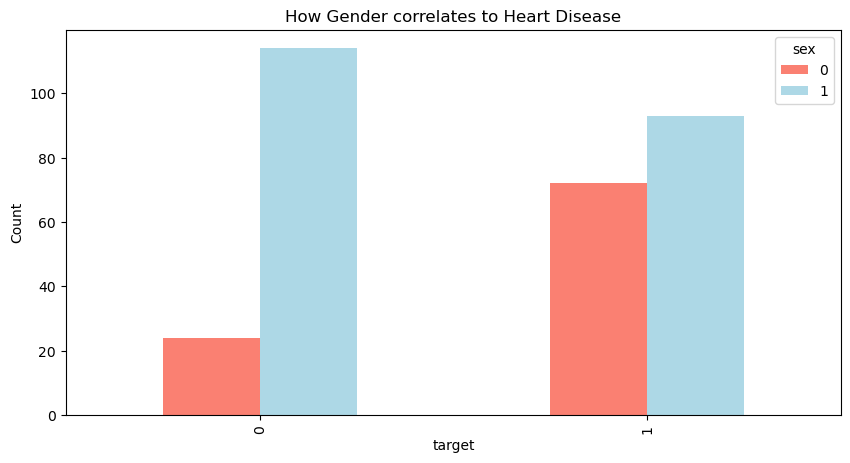

In [14]:
pd.crosstab(df.target , df.sex).plot(kind = "bar", color = ["salmon" , "lightblue"], figsize = (10,5), title = "How Gender correlates to Heart Disease" , ylabel = "Count")

Text(0, 0.5, 'Maximum Heart Rate')

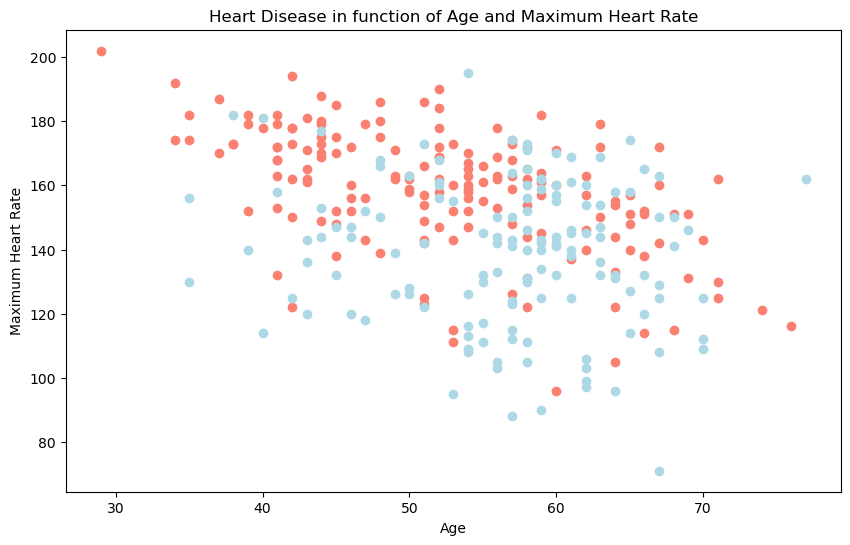

In [15]:
#Comparing Age vs Maximum Heart Rate
plt.figure(figsize = (10,6))

#Using scatter plot to plot age vs maximum heart rate for target = 1
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           color = "salmon")
#Using scatter plot to plot age vs maximum heart rate for target = 0
plt.scatter (df.age[df.target == 0], df.thalach[df.target ==0] , color = "lightblue")
plt.title("Heart Disease in function of Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


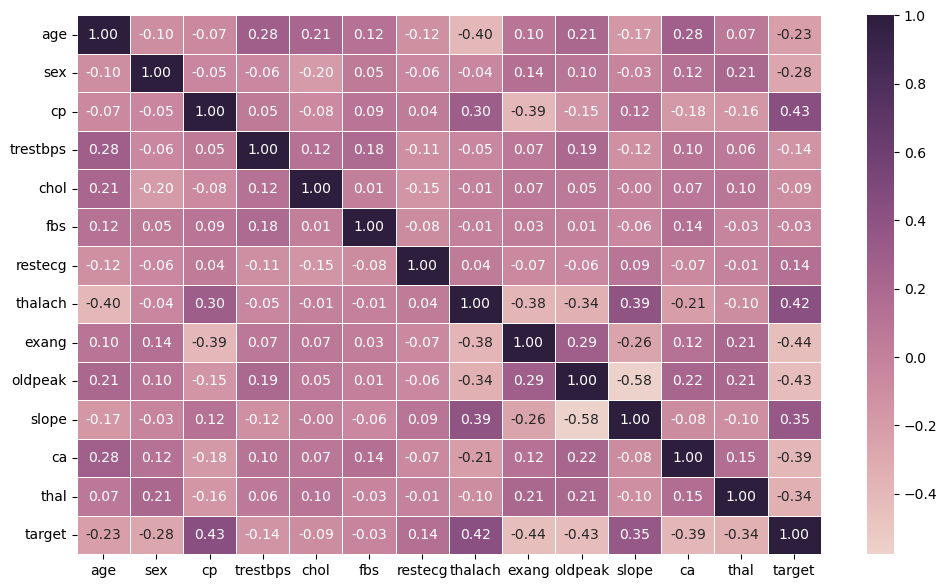

In [17]:
# Visualising Graphically
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (12,7))
ax = sns.heatmap(corr_matrix , annot = True , linewidths = 0.5 , fmt = ".2f", cmap = sns.cubehelix_palette(as_cmap=True))

## Modelling 

In [18]:
#Spliting the dataset
X = df.drop("target" , axis = 1)
y = df["target"]

#setting the random seed
np.random.seed(42)

#Splitting the data
X_train, X_test, y_train , y_test = train_test_split(X,y , test_size = 0.2, stratify = y)

In [19]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y_train

19     1
247    0
289    0
288    0
60     1
      ..
39     1
104    1
140    1
114    1
110    1
Name: target, Length: 242, dtype: int64

In [21]:
X_train 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2


## Training the Model

Using Reference from https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

*We are going to use three models:* 

> 1.  Logistic Regression
> 2. K-Nearest Neighbour Classifier
> 3. Random Forest Classifier
> 4. Decision Tree Classifier
> 5. Naive Bayes Classifier

In [22]:
#Creating an empty list to store model scores 
model_scores = []


### Logistic Regression

In [23]:
Logistic_clf = LogisticRegression()
Logistic_clf.fit(X_train , y_train)
model_scores.append(Logistic_clf.score(X_test , y_test))
Logistic_clf.score(X_test , y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8032786885245902

### KNN Classifier

In [24]:
KNN_clf = KNeighborsClassifier(n_neighbors = 4)
KNN_clf.fit(X_train , y_train)

model_scores.append(KNN_clf.score(X_test , y_test))
KNN_clf.score(X_test , y_test)

0.5901639344262295

### Random Forest Classifier 

In [25]:
RandomForest_clf = RandomForestClassifier(n_estimators = 100)
RandomForest_clf.fit(X_train , y_train )
model_scores.append(RandomForest_clf.score(X_test , y_test))
RandomForest_clf.score(X_test , y_test)

0.8032786885245902

### Decision Tree 

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

model_scores.append(tree.score(X_test, y_test))
tree.score(X_test, y_test)

0.7213114754098361

### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB  
NaiveBayes_clf = GaussianNB()  
NaiveBayes_clf.fit(X_train, y_train)
model_scores.append(NaiveBayes_clf.score(X_test , y_test))
NaiveBayes_clf.score(X_test, y_test)

0.819672131147541

In [28]:
model_scores

[0.8032786885245902,
 0.5901639344262295,
 0.8032786885245902,
 0.7213114754098361,
 0.819672131147541]

In [29]:
train_scores = []
test_scores = []
neighbors = range(1,100)
knn_clf = KNeighborsClassifier()
# Tuning Hyperparameters of KNN 
for i in range(1,100):
    knn_clf.set_params(n_neighbors = i)
    knn_clf.fit(X_train , y_train)
    train_scores.append(knn_clf.score(X_train , y_train))
    test_scores.append(knn_clf.score(X_test, y_test))


In [30]:
train_scores

[1.0,
 0.8057851239669421,
 0.7851239669421488,
 0.7727272727272727,
 0.7520661157024794,
 0.7520661157024794,
 0.7479338842975206,
 0.7355371900826446,
 0.743801652892562,
 0.743801652892562,
 0.7355371900826446,
 0.7355371900826446,
 0.7148760330578512,
 0.7107438016528925,
 0.71900826446281,
 0.7107438016528925,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6983471074380165,
 0.6942148760330579,
 0.6900826446280992,
 0.6983471074380165,
 0.6942148760330579,
 0.7107438016528925,
 0.6859504132231405,
 0.6983471074380165,
 0.6983471074380165,
 0.6942148760330579,
 0.6859504132231405,
 0.6859504132231405,
 0.6776859504132231,
 0.6652892561983471,
 0.6900826446280992,
 0.6818181818181818,
 0.6818181818181818,
 0.6818181818181818,
 0.7024793388429752,
 0.6611570247933884,
 0.6570247933884298,
 0.6652892561983471,
 0.6528925619834711,
 0.6694214876033058,
 0.6694214876033058,
 0.6570247933884298,
 0.6611570247933884,
 0.6570247933884298,
 0.6570247933884298,
 0.67355371

In [31]:
test_scores

[0.5409836065573771,
 0.5409836065573771,
 0.6229508196721312,
 0.5901639344262295,
 0.5901639344262295,
 0.5737704918032787,
 0.639344262295082,
 0.5901639344262295,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6229508196721312,
 0.6065573770491803,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.65573770491803

Text(0, 0.5, 'Model Score')

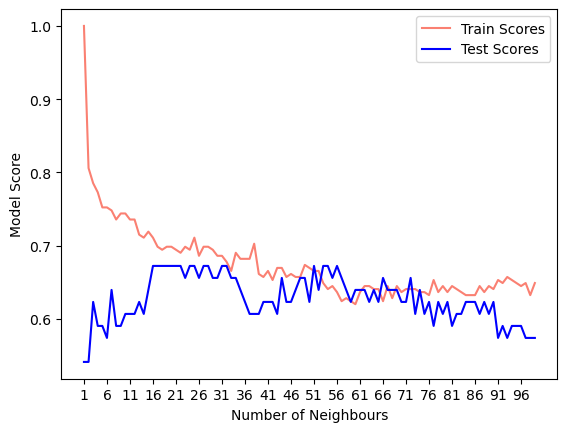

In [32]:
plt.plot(neighbors, train_scores , label  = "Train Scores" , color = "Salmon")
plt.plot(neighbors, test_scores , label  = "Test Scores" , color = "blue")
plt.xticks(np.arange(1, 100 , 5))
plt.legend()
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")

## Tuning Hyperparameters using Randomized SearchCV

In [33]:
#generating grid space for logistic regression 
log_reg_grid = {"C" : np.logspace(-4,4,20) , 
               "solver" : ["liblinear"]}

#Creating Grid for Random Forest 
rf_grid = {"n_estimators" : np.arange(10,1000 , 50) , 
          "max_depth" : [None, 3 ,5 , 10] ,
          "min_samples_split" : np.arange(1,20,2) ,
          "min_samples_leaf": np.arange(2 ,20, 2)}

In [34]:
#Tune Logistic Regression 
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid ,
                               cv = 5 ,
                               n_iter = 20 ,
                               verbose = True)
#Fitting the model
rs_log_reg.fit(X_train , y_train)
rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.7868852459016393

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
#Tune Logistic Regression 
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid ,
                               cv = 5 ,
                               n_iter = 20 ,
                               verbose = True)
#Fitting the model
rs_rf.fit(X_train , y_train)
rs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.819672131147541

In [37]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 13,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [38]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = RandomizedSearchCV(estimator=GaussianNB(), param_distributions=param_grid_nb, verbose=1, cv=10, n_jobs=-1 , n_iter = 20)

nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=GaussianNB(), n_iter=20, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=1)

In [39]:
nbModel_grid.score(X_test , y_test)

0.8032786885245902

In [40]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid ,
                               cv = 5 ,
                               n_iter = 20 ,
                               verbose = True)
#Fitting the model
rs_log_reg.fit(X_train , y_train)
rs_log_reg.score(X_test, y_test) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.7868852459016393

## GridSearchCV 

In [41]:
#Creating Grid for Logical Regression
log_reg_grid = {"C" : np.logspace(-4 ,4 ,20) ,
               "solver" : ["liblinear"]}
#Creating Grid for Random Forest
rf_grid = {"n_estimators" : np.arange(10 , 1000 , 50), 
           "max_depth" : [None, 3 , 5 ,10] , 
           "min_samples_split" : np.arange(2 ,20 ,2) ,
           "min_samples_leaf" : np.arange(1,20,2)}


In [42]:
#Setup Grid hyper parameter for Logical Regression 
gs_log_Reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid ,
                         cv=5 ,
                         verbose = True)

gs_log_Reg.fit(X_train, y_train)
gs_log_Reg.score(X_test , y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.7868852459016393

In [43]:
gs_log_Reg.best_params_


{'C': 0.23357214690901212, 'solver': 'liblinear'}

## Evaluating Models 

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 score

In [44]:
y_preds = rs_rf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [45]:
y_test

179    0
197    0
285    0
194    0
188    0
      ..
14     1
4      1
224    0
202    0
12     1
Name: target, Length: 61, dtype: int64

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


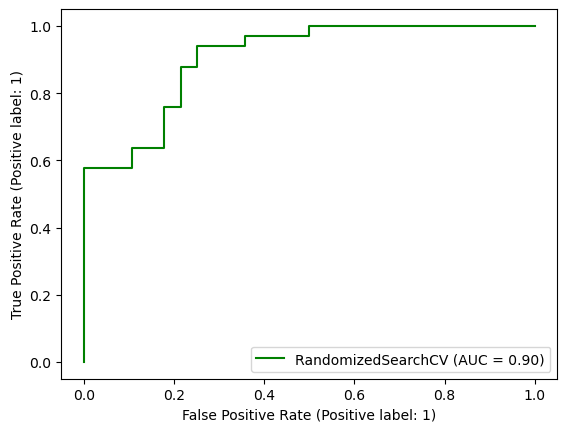

In [46]:
#Plotting ROC curve and AUC

plot_roc_curve(rs_rf , X_test , y_test , color ='green')

In [47]:
print(confusion_matrix(y_test, y_preds))

[[18 10]
 [ 1 32]]


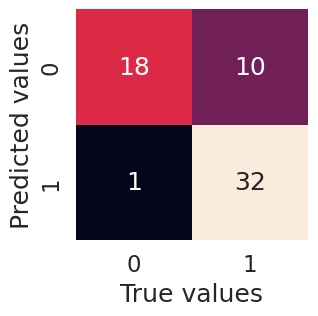

In [48]:
sns.set(font_scale = 1.5)

#Helper Function to plot confusion matrix

def plot_conf_matrix(y_test, y_preds):
    "'Plots a graphical confusion matrix using Seaborn Heatmap'"
    
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds) , annot = True , cbar = False)
    
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    
plot_conf_matrix(y_test , y_preds)

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



### Evaluation of the model using Cross Validation

In [50]:
rs_rf.best_params_


{'n_estimators': 710,
 'min_samples_split': 13,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [51]:
classifier = RandomForestClassifier(n_estimators = 710,
                                    min_samples_split = 13,
                                    min_samples_leaf= 4,
                                    max_depth = 10)

In [52]:
clf = LogisticRegression(C = 0.23357214690901212 , solver = "liblinear" )

In [53]:
cv_acc = cross_val_score(classifier , X , y , cv =5 , scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.828360655737705

In [54]:
cv_precision = cross_val_score(classifier , X , y , cv =5 , scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8312576312576312

In [55]:
cv_recall = cross_val_score(classifier , X , y , cv =5 , scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8666666666666666

In [56]:
cv_f1 = cross_val_score(classifier , X , y , cv =5 , scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.847657934329973

### Important Features


In [57]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [58]:
clf.coef_

array([[ 0.01069193, -0.8148039 ,  0.79877692, -0.00934758, -0.00674863,
        -0.10775787,  0.30533587,  0.02938368, -0.59307528, -0.4886176 ,
         0.33083335, -0.48037918, -0.75489816]])

In [59]:
feature_dict = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.010691931432572313,
 'sex': -0.814803903049647,
 'cp': 0.7987769196163983,
 'trestbps': -0.009347583290568654,
 'chol': -0.006748634265768441,
 'fbs': -0.10775786779914008,
 'restecg': 0.30533587493245834,
 'thalach': 0.029383684686322083,
 'exang': -0.5930752818433677,
 'oldpeak': -0.48861759761794504,
 'slope': 0.33083334516422686,
 'ca': -0.480379177113873,
 'thal': -0.7548981559102163}

<AxesSubplot:title={'center':'Feature correlation'}>

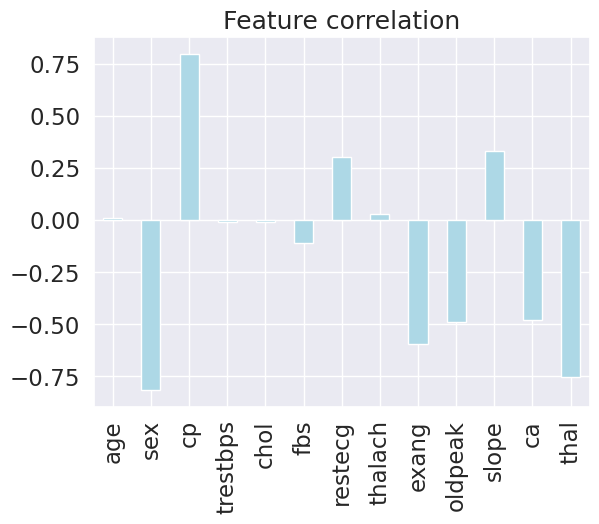

In [60]:
feature_df = pd.DataFrame(feature_dict , index = [0])
feature_df.T.plot.bar(title = "Feature correlation" , legend  = False , color = 'lightblue')